In [1]:
import pandas as pd
import numpy as np

from typing import Dict, Text

import tensorflow as tf
import tensorflow_recommenders as tfrs

import matplotlib.pyplot as plt

from functools import reduce

from sklearn.model_selection import train_test_split

In [2]:
EPOCHS = 10

In [3]:
reviews = pd.read_csv("hummus/preprocessed/pp_reviews.csv")
reviews.sample(5)

C:\Users\josea\AppData\Local\Temp\ipykernel_25924\2878708627.py:1: DtypeWarning: Columns (4,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv("hummus/preprocessed/pp_reviews.csv")


,Unnamed: 0,member_id,recipe_id,rating,text,likes,last_modified_date,review_id,review_url,member_url,new_member_id,new_recipe_id
338783,338783,1173094,119107,5.0,Great recipe! i made some small modifications ...,0.0,2009-07-14,907421.0,https://www.food.com/recipe/whole-wheat-strawb...,https://www.food.com/user/1173094,95275,398319
554721,554721,768828,26557,5.0,Loved this. I did add a little more tomato as...,0.0,2014-05-13,1442193.0,https://www.food.com/recipe/zucchini-or-yellow...,https://www.food.com/user/768828,1869,480312
988059,988059,2000800522,425023,5.0,"This really looked awful, but it was delicious...",0.0,2021-09-05,2095940.0,https://www.food.com/recipe/pomelo-salad-42502...,https://www.food.com/user/2000800522,48890,143231
1419008,1419008,184986,140876,6.0,NaN,NaN,2013-01-31,NaN,NaN,NaN,2735,9106
912467,912467,2290619,368191,5.0,I really was skeptical to whether this recipe ...,0.0,2012-06-11,1311101.0,https://www.food.com/recipe/lemon-poppy-seed-q...,https://www.food.com/user/2290619,199640,111206


In [4]:
recipes = pd.read_csv("hummus/preprocessed/pp_recipes.csv")
recipes['nutri_score'] = recipes['nutri_score'].apply(lambda x: int(x*100))
recipes['protein [g]'] = recipes['protein [g]'].apply(lambda x: int(x*10))
recipes['ingredients'] = recipes['ingredients'].apply(str)
recipes.sample(5)

C:\Users\josea\AppData\Local\Temp\ipykernel_25924\2296249471.py:1: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  recipes = pd.read_csv("hummus/preprocessed/pp_recipes.csv")


,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,...,sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
340162,340162,300249,Gluten Free Shake and Bake Mixture,I got this recipe off Allrecipes. It's much be...,616082,25.0,['Place bread slices on a tray in a 350 degree...,"{'': [('slices gluten free bread', '8 time(s)...",4,2013-12-11,...,0.1,1,4,11,0.139456,NaN,25,*,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Greek yogurt', 'almonds', 'chai tea teabags'..."
212829,212829,425927,Sugar-Free Lemon Cheesecake,"I try to eat as little sugar as possible, but ...",822313,50.0,"['Preheat oven to 350 degrees.', 'Beat cream c...","{'': [('packages cream cheese, softened', '2 t...",8,2010-05-17,...,11.8,71,8,7,0.021475,0.125,0,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Nori Goma Furikake', 'cooked sticky rice', '..."
352729,352729,152437,Best Ever Baked Beans,"Whenever I make these, there are never leftove...",278113,40.0,"['In skillet, fry chopped onions until tender....","{'': [('hot pork sausage', '0.5 time(s) lb '),...",4,2008-06-23,...,19.6,199,5,7,0.224777,0.125,25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['mouthwash', 'water']"
103393,103393,465168,"Chateaubriand for Two With Lobster Tails, Chat...",This is the perfect romantic dinner because Ch...,305531,80.0,"['TO PREPARE THE CHATEAU POTATOES:', 'Cut the ...",{'For the Chateaubriand': [('center-cut beef t...,2,2011-09-29,...,2.1,534,36,18,0.130207,0.250,0,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Mature cheddar cheese', 'butter', 'dried her..."
329894,329894,334616,Chipotle Garlic Salsa,The ease of preparation and the versatility of...,1006455,60.0,"['Place tomatoes, with their juice, in a mediu...","{'': [('diced tomatoes', '2 time(s) (14 1/2 ou...",12,2009-05-12,...,2.7,8,3,7,0.301065,0.750,50,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['beef prosciutto', 'chipotle peppers', 'chive..."


In [5]:
reviews = pd.merge(reviews, recipes, on='recipe_id', how='inner')

In [6]:
members = pd.read_csv("hummus/preprocessed/pp_members.csv")
members['member_description'] = members['member_description'].fillna("")
members.sample(5)

,Unnamed: 0,member_id,member_url,member_name,member_description,member_status,member_avg_rating,member_map_pin,member_joined,follows_count,follow_me_count,avatar_url,new_member_id
74977,74977,2001623746,https://www.food.com/user/2001623746,Margie D.,,NaN,NaN,NaN,2017-07-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,210105
253996,253996,2361380,https://www.food.com/user/2361380,southernangel4x4,,NaN,NaN,NaN,2012-08-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,79784
122327,122327,802872,https://www.food.com/user/802872,Chef Dean 2,,Contributor,4.8,NaN,2008-03-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,68982
52178,52178,79801,https://www.food.com/user/79801,Kari Hinkens,,NaN,5.0,NaN,2003-03-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,282313
207385,207385,2001975395,https://www.food.com/user/2001975395,Dannette J.,,NaN,NaN,NaN,2018-02-01,0,0,https://geniuskitchen.sndimg.com/gk/img/avatar...,16199


In [7]:
reviews = pd.merge(reviews, members, on='member_id', how='inner')

In [8]:
member_ids  = reviews["member_id"].unique()
recipe_ids = reviews["recipe_id"].unique()
titles = reviews["title"].unique()
nutri_scores = reviews["nutri_score"].unique()
proteins = reviews["protein [g]"].unique()
ingredients = reviews["ingredients"].unique()
member_descriptions = reviews["member_description"].unique()
total_ratings = len(reviews.index)

In [9]:
class RankingModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        embedding_dimension = 32

        # Compute embeddings for members.
        self.user_embeddings = tf.keras.Sequential([
            tf.keras.layers.IntegerLookup(
                vocabulary=member_ids, mask_token=None),
            tf.keras.layers.Embedding(len(member_ids) + 1, embedding_dimension)
        ])

        # Compute embeddings for recipes.
        self.recipe_embeddings = tf.keras.Sequential([
            tf.keras.layers.IntegerLookup(
                vocabulary=recipe_ids, mask_token=None),
            tf.keras.layers.Embedding(len(recipe_ids) + 1, embedding_dimension)
        ])
        
        # Compute embeddings for titles.
        self.title_embeddings = tf.keras.Sequential([
            tf.keras.layers.StringLookup(
                vocabulary=titles, mask_token=None),
            tf.keras.layers.Embedding(len(titles) + 1, embedding_dimension)
        ])
        
        # Compute embeddings for nutri_scores.
        self.nutri_embeddings = tf.keras.Sequential([
            tf.keras.layers.IntegerLookup(
                vocabulary=nutri_scores, mask_token=None),
            tf.keras.layers.Embedding(len(nutri_scores) + 1, embedding_dimension)
        ])
        
        # Compute embeddings for proteins.
        self.protein_embeddings = tf.keras.Sequential([
            tf.keras.layers.IntegerLookup(
                vocabulary=proteins, mask_token=None),
            tf.keras.layers.Embedding(len(proteins) + 1, embedding_dimension)
        ])
        
        # Compute embeddings for ingredients.
        self.ingredients_embeddings = tf.keras.Sequential([
            tf.keras.layers.StringLookup(
                vocabulary=ingredients, mask_token=None),
            tf.keras.layers.Embedding(len(ingredients) + 1, embedding_dimension)
        ])
        
        # Compute embeddings for member descriptions.
        self.description_embeddings = tf.keras.Sequential([
            tf.keras.layers.StringLookup(
                vocabulary=member_descriptions, mask_token=None),
            tf.keras.layers.Embedding(len(member_descriptions) + 1, embedding_dimension)
        ])

        # Compute predictions.
        self.ratings = tf.keras.Sequential([
            # Learn multiple dense layers.
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            # Make rating predictions in the final layer.
            tf.keras.layers.Dense(1)
        ])

    def call(self, inputs):
        member_id, recipe_id, title, nutri_score, protein, ingredient, description = inputs

        member_embedding = self.user_embeddings(member_id)
        recipe_embedding = self.recipe_embeddings(recipe_id)
        title_embedding = self.title_embeddings(title)
        nutri_score_embedding = self.nutri_embeddings(nutri_score)
        protein_embedding = self.protein_embeddings(protein)
        ingredient_embedding = self.ingredients_embeddings(ingredient)
        description_embedding = self.description_embeddings(description)

        return self.ratings(tf.concat([member_embedding,
                                       recipe_embedding,
                                       title_embedding,
                                       nutri_score_embedding,
                                       protein_embedding,
                                       ingredient_embedding,
                                       description_embedding
                                      ], axis=1))


In [10]:
class RecipesModel(tfrs.models.Model):
    def __init__(self):
        super().__init__()
        self.ranking_model: tf.keras.Model = RankingModel()
        self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[
                tf.keras.metrics.RootMeanSquaredError(),
                tf.keras.metrics.MeanAbsoluteError(),
                tf.keras.metrics.MeanSquaredError(),

            ],
        )

    def call(self, features: Dict[str, tf.Tensor]) -> tf.Tensor:
        return self.ranking_model((features["member_id"],
                                   features["recipe_id"],
                                   features['title'],
                                   features['nutri_score'],
                                   features['protein'],
                                   features['ingredients'],
                                   features['member_description']
                                 ))

    def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
        labels = features["rating"]
        rating_predictions = self(features)

        # The task computes the loss and the metrics.
        return self.task(labels=labels, predictions=rating_predictions)


In [11]:
train_df, test_df = train_test_split(reviews, test_size=0.2, random_state=42)

train_tf = tf.data.Dataset.from_tensor_slices({
    "member_id": tf.cast(train_df["member_id"].values, tf.int64),
    "recipe_id": tf.cast(train_df["recipe_id"].values, tf.int64),
    "title": tf.cast(train_df["title"].values, tf.string),
    "nutri_score": tf.cast(train_df["nutri_score"].values, tf.int32),
    "protein": tf.cast(train_df["protein [g]"].values, tf.int32),
    "ingredients": tf.cast(train_df["ingredients"].values, tf.string),
    "member_description": tf.cast(train_df["member_description"].values, tf.string),
    "rating": tf.cast(train_df["rating"].values, tf.float32)
})

test_tf = tf.data.Dataset.from_tensor_slices({
    "member_id": tf.cast(test_df["member_id"].values, tf.int64),
    "recipe_id": tf.cast(test_df["recipe_id"].values, tf.int64),
    "title": tf.cast(test_df["title"].values, tf.string),
    "nutri_score": tf.cast(test_df["nutri_score"].values, tf.int32),
    "protein": tf.cast(test_df["protein [g]"].values, tf.int32),
    "ingredients": tf.cast(test_df["ingredients"].values, tf.string),
    "member_description": tf.cast(test_df["member_description"].values, tf.string),
    "rating": tf.cast(test_df["rating"].values, tf.float32)
})

In [12]:
tf.random.set_seed(42)
train = train_tf.shuffle(100_000, seed=42, reshuffle_each_iteration=False)
test = test_tf.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

In [13]:
model = RecipesModel()
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()
model.fit(cached_train, epochs=EPOCHS)

Epoch 1/10


c:\Users\josea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:359: UserWarning: `build()` was called on layer 'recipes_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


186/186 ━━━━━━━━━━━━━━━━━━━━ 59s 290ms/step - loss: 14.6742 - regularization_loss: 0.0000e+00 - total_loss: 14.7531
Epoch 2/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 42s 225ms/step - loss: 0.9310 - regularization_loss: 0.0000e+00 - total_loss: 0.9360
Epoch 3/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 42s 224ms/step - loss: 0.9241 - regularization_loss: 0.0000e+00 - total_loss: 0.9290
Epoch 4/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 42s 224ms/step - loss: 0.9150 - regularization_loss: 0.0000e+00 - total_loss: 0.9200
Epoch 5/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 42s 226ms/step - loss: 0.9039 - regularization_loss: 0.0000e+00 - total_loss: 0.9088
Epoch 6/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 42s 227ms/step - loss: 0.8924 - regularization_loss: 0.0000e+00 - total_loss: 0.8972
Epoch 7/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - loss: 0.8816 - regularization_loss: 0.0000e+00 - total_loss: 0.8863
Epoch 8/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - loss: 0.8714 - regularization_loss: 0.0000e+00 - total_loss: 0.8761
Epoch 9/1

In [14]:
model.evaluate(cached_test, return_dict=True)

93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.8431 - regularization_loss: 0.0000e+00 - total_loss: 0.8521


{'loss': 0.0}

In [15]:
def predict_rating(member_id, recipe_ids):
    titles = []
    nutri_scores = []
    proteins = []
    ingredients = []
    descriptions = []
    for recipe_id in recipe_ids:
        titles.append(reviews[reviews['recipe_id'] == recipe_id]['title'].unique()[0])
        nutri_scores.append(reviews[reviews['recipe_id'] == recipe_id]['nutri_score'].unique()[0])
        proteins.append(reviews[reviews['recipe_id'] == recipe_id]['protein [g]'].unique()[0])
        ingredients.append(reviews[reviews['recipe_id'] == recipe_id]['ingredients'].unique()[0])
        descriptions.append(reviews[reviews['recipe_id'] == recipe_id]['member_description'].unique()[0])
        
    return model({
        "member_id"         : tf.constant([member_id] * len(recipe_ids), dtype=tf.int64),
        "recipe_id"         : tf.constant(recipe_ids, dtype=tf.int64),
        "title"             : tf.constant(titles, dtype=tf.string),
        "nutri_score"       : tf.constant(nutri_scores, dtype=tf.int32),
        "protein"           : tf.constant(proteins, dtype=tf.int32),
        "ingredients"       : tf.constant(ingredients, dtype=tf.string),
        "member_description": tf.constant(descriptions, dtype=tf.string),
    }).numpy().flatten()

In [16]:
def real_vs_predicted_ratings(user_id):
    real_ratings_df = test_df[test_df['member_id'] == user_id]
    real_ratings = {}
    predicted_ratings = {}
    for rating in real_ratings_df.iterrows():
        real_ratings[rating[1]['recipe_id']] = rating[1]['rating']
    asdasd = predict_rating(user_id, list(real_ratings.keys()))
    for idx, rating in enumerate(real_ratings):
        predicted_ratings[rating] = asdasd[idx]
    return real_ratings, predicted_ratings

In [17]:
user_id = 126602
real_ratings, predicted_ratings = real_vs_predicted_ratings(user_id)

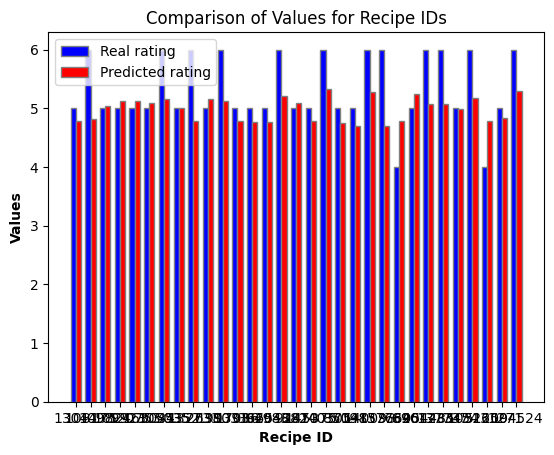

In [18]:
# Extracting recipe_ids
recipe_ids = list(real_ratings.keys())

# Extracting values from dictionaries
values_dict1 = [real_ratings[recipe_id] for recipe_id in recipe_ids]
values_dict2 = [predicted_ratings[recipe_id] for recipe_id in recipe_ids]

# Setting up positions for the bars
bar_width = 0.35
r1 = range(len(recipe_ids))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.bar(r1, values_dict1, color='b', width=bar_width, edgecolor='grey', label='Real rating')
plt.bar(r2, values_dict2, color='r', width=bar_width, edgecolor='grey', label='Predicted rating')

# Adding labels and title
plt.xlabel('Recipe ID', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(recipe_ids))], recipe_ids)
plt.title('Comparison of Values for Recipe IDs')
plt.legend()
# Showing the plot
plt.savefig('recipes_member_embeddings_' + str(EPOCHS) + 'epochs.jpg')

In [19]:
test_df['member_id'].value_counts().iloc[[2000]]

member_id
40939    24
Name: count, dtype: int64

In [20]:
top_10_real = list(map(lambda x: x[0], sorted(real_ratings.items(), key=lambda x: x[1], reverse=True)[:10]))

In [21]:
top_10_predicted = list(map(lambda x: x[0], sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:10]))

In [22]:
hits = 0
for i in top_10_predicted:
    if i in top_10_real: hits += 1

print(f"{hits}/10")

5/10


In [23]:
# Computation of P@k
K = 10

# data to analyse if the RS recommends only popular recipes
BETTER_RATED = [45809,2886,39087,27208,89204,35813,67256,22782,32204,54257,69173,25690,73440,82102,68955] #ids of recipes
MOST_REVIEWED = [45809,2886,27208,89204,39087,67256,35813,54257,22782,32204,420398,25690,73440,69173,68955] #ids of recipes

better_rated = BETTER_RATED[:K]
most_reviewed = MOST_REVIEWED[:K]

# 1. Get unique user_ids
test_unique_user_ids = test_df['member_id'].unique()[:int(0.01 * len(test_df['member_id'].unique()))]

In [24]:
user_rankings = {}

# accumulators
sum_precision_at_k = 0
sum_precision_most_reviewed = 0
sum_precision_better_rated = 0

user_counter = 0
for idx, user_id in enumerate(test_unique_user_ids):
    if idx % 100 == 0:
        print(idx)
    real_ratings, predicted_ratings = real_vs_predicted_ratings(user_id)

    # relevant recipes
    real_ratings = sorted(real_ratings.items(), key=lambda x: x[1], reverse=True)

    if len(real_ratings) < K or real_ratings[K - 1][1] < 5:
        continue

    # top predicted ratings
    top_k_predictions = list(map(lambda x: x[0], sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:K]))

    # popularity analysis at k
    precision_better_rated = reduce(lambda x, y : x + 1 if y in better_rated else 0, top_k_predictions, 0) / K
    precision_most_reviewed = reduce(lambda x, y : x + 1 if y in most_reviewed else 0, top_k_predictions, 0) / K

    real_ratings = list(map(lambda y: y[0], filter(lambda x : x[1] >= real_ratings[K - 1][1], real_ratings)))

    precision_at_k = reduce(lambda x, y : x + 1 if y in real_ratings else 0, top_k_predictions, 0) / K

    sum_precision_better_rated += precision_better_rated
    sum_precision_most_reviewed += precision_most_reviewed
    sum_precision_at_k += precision_at_k
    user_counter += 1

average_precision_at_k = sum_precision_at_k / user_counter
average_most_reviewed_at_k = sum_precision_most_reviewed / user_counter
average_better_rated_at_k = sum_precision_better_rated / user_counter

print(f'Average P@{K}: {average_precision_at_k}')
print(f'Average better_rated@{K}: {average_better_rated_at_k}')
print(f'Average most_reviewed@{K}: {average_most_reviewed_at_k}')
  

0
100
200
300
400
500
600
700
800
900
Average P@10: 0.25569358178053797
Average better_rated@10: 0.0
Average most_reviewed@10: 0.0


In [25]:
# analysis: see how different from the baseline (most_reviewed and better_rated) is our model
test_unique_user_ids = test_df['member_id'].unique()